## Sentiment Analysis Part 2: Scikit Learn

Using the bag-of-words approach: https://en.wikipedia.org/wiki/Bag-of-words_model

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [2]:
data = pd.read_csv("train_test.csv")

In [3]:
data['sentiment'] = data['sentiment'].astype('bool')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         75000 non-null  object
 1   review     75000 non-null  object
 2   sentiment  75000 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 1.2+ MB


In [5]:
data.head()

,id,review,sentiment
0,0,one of the other reviewers has mentioned that ...,True
1,1,a wonderful little production the filming tech...,True
2,2,i thought this was a wonderful way to spend ti...,True
3,3,basically there's a family where a little boy ...,False
4,4,petter mattei's love in the time of money is a...,True


In [6]:
vectorizer = CountVectorizer()
data_list = data['review'].to_list()
x_train = vectorizer.fit_transform(data_list)

In [7]:
#print(x_train[0])

In [8]:
x_train = x_train.astype(bool).toarray()    # use astype(np.uint8) or astype(bool)  to avoid error

In [9]:
print(x_train.shape)

(75000, 99394)


In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

In [11]:
forest.fit(x_train[:25000], data['sentiment'][:25000])

RandomForestClassifier()

### Training data

In [12]:
predictions_train = forest.predict(x_train[:25000])

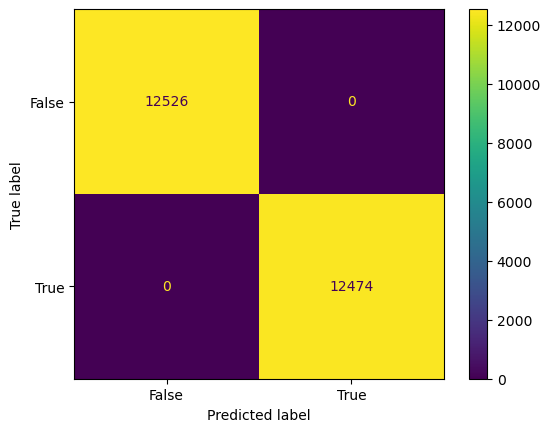

In [13]:
ConfusionMatrixDisplay.from_estimator(forest, x_train[:25000], data['sentiment'][:25000])

In [14]:
accuracy_score(data['sentiment'][:25000], predictions_train)

1.0

### Validation data

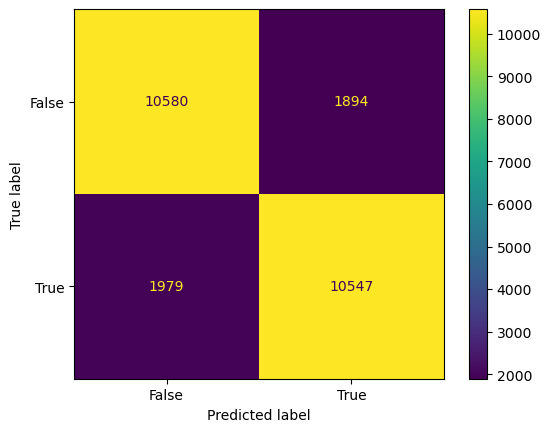

In [15]:
predictions = forest.predict(x_train[25000:50000])
ConfusionMatrixDisplay.from_estimator(forest, x_train[25000:50000], data['sentiment'][25000:50000])

In [16]:
accuracy_score(data['sentiment'][25000:50000], predictions)

0.84508

### Kaggle Submission - Test Data

In [32]:
submissions = forest.predict(x_train[50000:]).astype(int)

In [33]:
sub_out = pd.DataFrame(data={"id": data["id"][50000:], "sentiment": submissions})

In [34]:
sub_out.to_csv("Submission.csv", index=False)

Submission result: 92.304% accuracy